# Kaggle's house price prediction excercise

This is my implementation of the exercise in Kaggle's machine learning tutorial. It uses simple decision tree to make house price predictions based on seven features of a house.


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Data exploration


In [3]:
housing_prices = pd.read_csv('./dataset/train.csv')

In [4]:
y = housing_prices.SalePrice

# Features: lot area, year build, 1st floor square feet, 2nd floor square feet, full bathrooms above grade, 
#           bedrooms above grade, total rooms above grade
# grade = real estate term for above ground level
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = housing_prices[features]

In [5]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [6]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [7]:
# Split the training data to train and validate a model
train_X, validation_X, train_y, validation_y = train_test_split(X, y, random_state = 1)


# Finding the optimal number of leaves

Next I decided to try to find the most optimal number of leaves on my decision tree, based on the mean absolute error.

The reason why I didn't choose 152 as as the maximum number of leaves (the global minimum), is that I didn't like the small growth of the cost between it and the second smallest minimum - it just didn't seem right. So, I decided to use the second smallest global minimum instead.



In [8]:
def get_mae(max_leaf_nodes, train_X, validation_X, train_y, validation_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    model.fit(train_X, train_y)
    validation_prediction = model.predict(validation_X)
    mae = mean_absolute_error(validation_y, validation_prediction)
    
    return(mae)

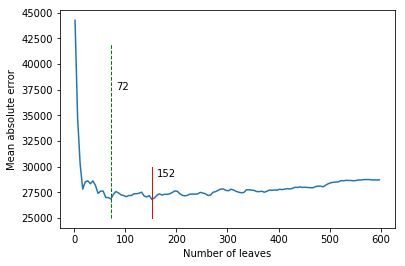

In [9]:
error_history = []
leaf_nodes = list(range(2, 600, 5))

for max_leaf_nodes in leaf_nodes:
    current_mae = get_mae(max_leaf_nodes, train_X, validation_X, train_y, validation_y)
    error_history.append(current_mae)

# The "second global minimum"
optimal_number_of_nodes = leaf_nodes[error_history.index(sorted(error_history)[1])]

# Graphed line of the cost
plt.plot(leaf_nodes, error_history)
plt.xlabel('Number of leaves')
plt.ylabel('Mean absolute error')

# "Second global minimum"
plt.plot([optimal_number_of_nodes, optimal_number_of_nodes], [25000, 42000], linestyle = 'dashed', c = 'g', linewidth = 1)
plt.text(82, 37500, optimal_number_of_nodes)

# "Global minimum"
plt.plot([152, 152], [25000, 30000], c = 'r', linewidth = 1)
plt.text(162, 29000, 152)

plt.show()   

# Model fitting, measuring error, and making predictions

In [10]:
model = DecisionTreeRegressor(max_leaf_nodes = optimal_number_of_nodes, random_state = 1)
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=72, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [11]:
validation_predictions = model.predict(validation_X)
mean_absolute_error(validation_y, validation_predictions)

18615.832521690463

In [12]:
#validation_predictions[:5]
for validation_prediction in range(5):
    print(validation_prediction, '      {0:.0f}'.format(validation_predictions[validation_prediction]))

0       182392
1       163719
2       129504
3       94105
4       146415


In [13]:
validation_y.head()

258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64

In [14]:
predictions = model.predict(X)
mean_absolute_error(y, predictions)

18640.19608773278

In [15]:
for prediction in range(5):
    print(prediction, '   {0:.0f}'.format(predictions[prediction]))

0    200688
1    146415
2    200688
3    163719
4    291893


In [16]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64